In [2]:
# pretty print all cell's output and not just the last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 15})
sns.set_style('whitegrid')
%matplotlib notebook

In [6]:
df = pd.read_csv('../data/survey2020.csv')

In [7]:
df.count()

Response ID           818
Name                  818
Email                 818
Score                 818
Comment               151
Response Timestamp    818
dtype: int64

<IPython.core.display.Javascript object>


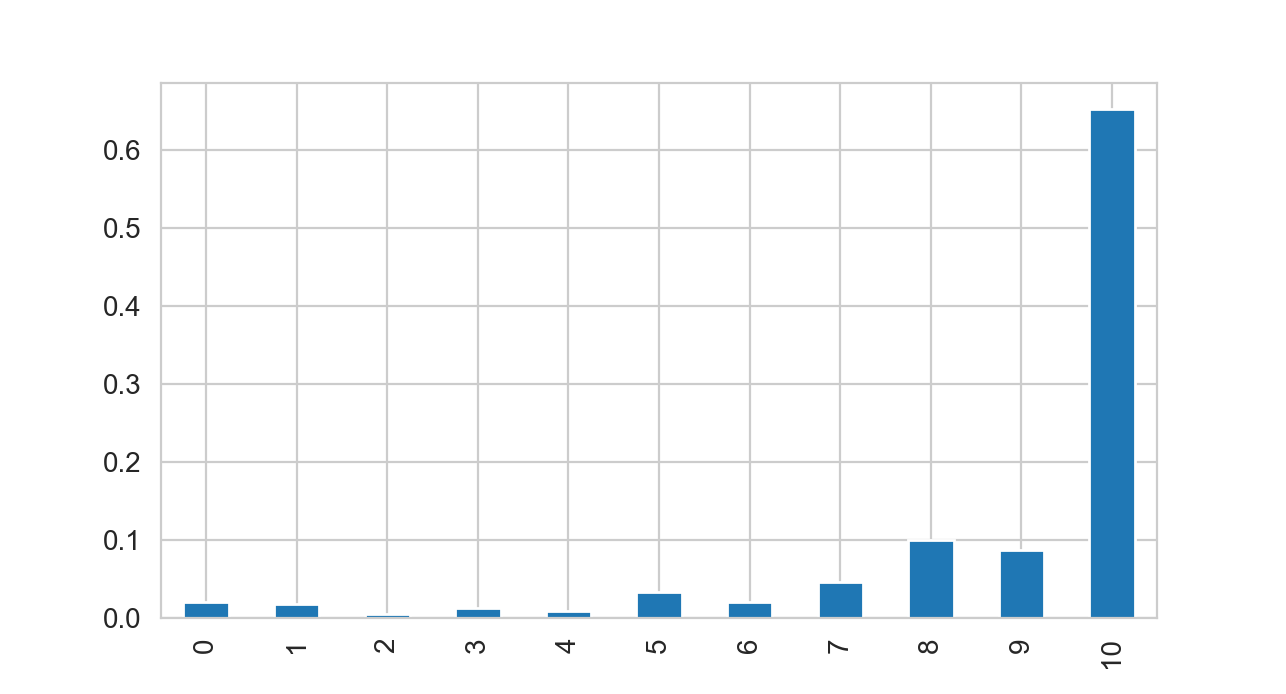

<AxesSubplot:>

In [51]:
(df['Score'].value_counts()/df['Score'].value_counts().sum()).sort_index().plot.bar()

In [ ]:
(df['Score'].value_counts()/df['Score'].value_counts().sum()).sort_index().plot.bar()

In [13]:
df['Comment'].isnull().value_counts()

True     667
False    151
Name: Comment, dtype: int64

In [55]:
df[(df['Score'] <=6)].count()/df.count()

Response ID           0.114914
Name                  0.114914
Email                 0.114914
Score                 0.114914
Comment               0.139073
Response Timestamp    0.114914
dtype: float64

In [59]:
6/21

0.2857142857142857

In [56]:
df[(df['Score'] <=6)].count()

Response ID           94
Name                  94
Email                 94
Score                 94
Comment               21
Response Timestamp    94
dtype: int64

In [8]:
def kw_stats(df, score_filter, kw):
    total = df.shape[0]
    sf_total = df[score_filter].score.count()
    print(
        f"Percent total with score: "
        f"{sf_total}/{total} = {100*sf_total/total:.1f}%")

    sn_filtered = df[score_filter].dropna(subset=['comment'])
    sn_total = sn_filtered['comment'].shape[0]
    print(f"Percent of scores with comments: "
          f"{sn_total}/{sf_total} = {100*sn_total/sf_total:.1f}%")

    kw_filt = sn_filtered['comment'].str.lower().str.contains(kw)
    c = df.loc[kw_filt[kw_filt].index]['comment']

    print(f"Percent of comments with keyword: "
          f"{c.count()}/{sn_total} = {100*c.count()/sn_total:.1f}%")
    
    print(f"Estimated percent total with keyword and score: "
         f"{100*(c.count()/sn_total) * sf_total/total:.1f}%")
    return c.values

In [10]:
df.columns = [s.lower() for s in df.columns]

In [15]:
kw = 'service'
kw_stats(df, df.score>=7, kw)
kw_stats(df, df.score<=6, kw)

Percent total with score: 724/818 = 88.5%
Percent of scores with comments: 130/724 = 18.0%
Percent of comments with keyword: 10/130 = 7.7%
Estimated percent total with keyword and score: 6.8%


array(['I very convenient, easy to bind, and has an excellent customer service.',
       'best service',
       'great premiums, great website, nice customer service',
       "Customer service was very responsive. Don't really understand why there is not a need for a signed application though.",
       'Ease of quoting. Once quoted there are no surprises. Customer service is easy to reach.',
       'The quoting tool is amazing. Downloading the policy and making a payment right when you bind is miraculous! Service is great!',
       'excellent service',
       'very quick and good service. I love that attune is so helpful via chat.',
       'website is simple customer service is quick and helpful!!',
       'The product is good but the service tends to be slow'],
      dtype=object)

Percent total with score: 94/818 = 11.5%
Percent of scores with comments: 21/94 = 22.3%
Percent of comments with keyword: 4/21 = 19.0%
Estimated percent total with keyword and score: 2.2%


array(['bad service',
       'poor UW response to change requests -- service is a chore, while quoting is a breeze.',
       'Customer service takes too long to response e-mails.',
       'service after the policy is bound is extremely slow'],
      dtype=object)

In [43]:
df[~df['Comment'].isnull()]['Score'].value_counts()

10    99
9     13
7     10
8      8
0      7
1      3
3      3
2      2
4      2
5      2
6      2
Name: Score, dtype: int64